# Project: Investigate a FBI Gun Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I'll be analyzing data associated with FBI Gun Data. First, using only gun data, I'll find out <b>in which states guns were purchased most and least.</b> I'll do this by analyzing data with python library pandas and visualize by <b>bar chart.</b> Next, using both gun and census data, I would be interested in finding <b>correlation between various elements and the total gun purchase.</b> In particular, whether persons per household and the poverty rate are correlated with gun purchase would be discussed. To find out the correlation, I'll draw <b>scatter plot.</b> Finally, using only census data, I'll figure out if the <b>bachelor's degree(or higher degree) is helpful to earn more money.</b> I'll use <b>line chart</b> to see how the percentage of people who have degree is changed by their income.  

In [139]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
%matplotlib inline 
sns.set_style('darkgrid')
gun=pd.read_csv('gun_data.csv')
census=pd.read_csv('census_data.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [233]:
#checking some items of gun data 
gun.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [234]:
#checking the columns of gun data 
gun.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [235]:
#checking some items of census data 
census.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [236]:
#checking what information the data has
census['Fact']

0          Population estimates, July 1, 2016,  (V2016)
1     Population estimates base, April 1, 2010,  (V2...
2     Population, percent change - April 1, 2010 (es...
3                     Population, Census, April 1, 2010
4     Persons under 5 years, percent, July 1, 2016, ...
5         Persons under 5 years, percent, April 1, 2010
6     Persons under 18 years, percent, July 1, 2016,...
7        Persons under 18 years, percent, April 1, 2010
8     Persons 65 years and over, percent,  July 1, 2...
9     Persons 65 years and over, percent, April 1, 2010
10     Female persons, percent,  July 1, 2016,  (V2016)
11               Female persons, percent, April 1, 2010
12         White alone, percent, July 1, 2016,  (V2016)
13    Black or African American alone, percent, July...
14    American Indian and Alaska Native alone, perce...
15         Asian alone, percent, July 1, 2016,  (V2016)
16    Native Hawaiian and Other Pacific Islander alo...
17    Two or More Races, percent, July 1, 2016, 

In [237]:
#checking the data types of census data 
#all of them are string. It seems that it needs some modification.
census.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


### Data Cleaning 

### 1) Data Cleaning for the first question
- Change the index of data
- Group the data by states

In [2]:
#changing the index of gun data to 'state'
gun.index=gun.state
gun=gun.drop(['state'], axis=1)

In [3]:
#getting the mean of the total gun purchase by states
gun_mean=gun.groupby('state').mean().totals
gun_mean

state
Alabama                  29542.198238
Alaska                    5011.643172
Arizona                  19496.537445
Arkansas                 16531.422907
California               83762.392070
Colorado                 26689.348018
Connecticut              13956.502203
Delaware                  2164.621145
District of Columbia        24.674009
Florida                  51523.246696
Georgia                  31761.859031
Guam                        66.066079
Hawaii                     870.396476
Idaho                     8670.193833
Illinois                 68156.537445
Indiana                  34084.458150
Iowa                     10119.629956
Kansas                   11562.418502
Kentucky                131112.044053
Louisiana                20727.123348
Maine                     5539.458150
Mariana Islands              2.035242
Maryland                  8967.629956
Massachusetts            11327.405286
Michigan                 31957.176211
Minnesota                27661.986784
Missis

### 2) Data Cleaning for the second question
- Some 'string' should be changed to 'float'
- Remove '%' 
- Change proportion to percentage by multiplying 100
- Remove unnecessary columns

In [4]:
#getting data only includes persons per household
pph=census[31:32]
pph

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
31,"Persons per household, 2011-2015",NaN,2.55,2.81,2.69,2.53,2.96,2.55,2.57,2.62,...,2.45,2.53,2.84,3.15,2.34,2.62,2.56,2.43,2.43,2.49


In [5]:
#checking data types
pph.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


In [6]:
#simplify the index of data and remove unnecessary columns 
pph.index=['Persons per Household']
pph=pph.drop('Fact', axis=1)
pph=pph.drop('Fact Note', axis=1)
pph

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Persons per Household,2.55,2.81,2.69,2.53,2.96,2.55,2.57,2.62,2.63,2.73,...,2.45,2.53,2.84,3.15,2.34,2.62,2.56,2.43,2.43,2.49


In [7]:
#changing all data as float
pph=pph.apply(lambda x: x.astype(float))

In [9]:
#getting data that only includes poverty rate
pov=census[49:50]
pov

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
49,"Persons in poverty, percent",NaN,17.10%,9.90%,16.40%,17.20%,14.30%,11.00%,9.80%,11.70%,...,0.133,0.158,15.60%,10.20%,11.90%,11.00%,11.30%,17.90%,11.80%,11.30%


In [10]:
#remove the string '%' in data and replace the string 'Z' with number '0'
for c in pov.columns[2:]:
    pov[c]=pov[c].apply(lambda x: x.split('%')[0])
    pov[c]=pov[c].apply(lambda x: x.replace('Z','0'))

c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\dudns_pk7j4bd\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
#simplify the index of data and remove unnecessary columns 
pov.index=['Poverty Rate']
pov=pov.drop('Fact', axis=1)
pov=pov.drop('Fact Note', axis=1)
pov

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Poverty Rate,17.10,9.90,16.40,17.20,14.30,11.00,9.80,11.70,14.70,16.00,...,0.133,0.158,15.60,10.20,11.90,11.00,11.30,17.90,11.80,11.30


In [12]:
#changing all data(except 'Fact' and 'Fact Note') as float
pov=pov.astype(float)

In [13]:
#finding the column names that need to be changed
changes=[]
for c in pov.columns:
    if pov[c].sum()<1:
        changes.append(c)

In [14]:
#changing proportion to percentage 
for col in changes:
    pov[col]*=100
pov

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Poverty Rate,17.1,9.9,16.4,17.2,14.3,11.0,9.8,11.7,14.7,16.0,...,13.3,15.8,15.6,10.2,11.9,11.0,11.3,17.9,11.8,11.3


### 3) Data Cleaning for the third question
- Some 'string' should be changed to 'float'
- Remove '%', '$'
- Change proportion to percentage by multiplying 100
- Remove unnecessary columns

In [16]:
#getting data of the percentage of bachelor's degree or higher 
bachelor=census[35:36]
bachelor

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
35,"Bachelor's degree or higher, percent of person...",NaN,23.50%,28.00%,27.50%,21.10%,31.40%,38.10%,37.60%,30.00%,...,0.27,0.249,27.60%,31.10%,36.00%,36.30%,32.90%,19.20%,27.80%,25.70%


In [17]:
#simplify the index of data and remove unnecessary columns 
bachelor.index=['Bachelor or Higher']
bachelor=bachelor.drop('Fact', axis=1)
bachelor=bachelor.drop('Fact Note', axis=1)
bachelor

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Bachelor or Higher,23.50%,28.00%,27.50%,21.10%,31.40%,38.10%,37.60%,30.00%,27.30%,28.80%,...,0.27,0.249,27.60%,31.10%,36.00%,36.30%,32.90%,19.20%,27.80%,25.70%


In [18]:
#remove the string '%' in data and replace the string 'Z' with number '0'
for c in bachelor.columns:
    bachelor[c]=bachelor[c].apply(lambda x: x.split('%')[0])
    bachelor[c]=bachelor[c].apply(lambda x: x.replace('Z','0'))

In [19]:
#changing all data(except 'Fact' and 'Fact Note') as float
bachelor=bachelor.astype(float)

In [20]:
#finding the column names that need to be changed
changes=[]
for c in bachelor.columns:
    if bachelor[c].sum()<1:
        changes.append(c)

In [21]:
#changing proportion to percentage 
for col in changes:
    bachelor[col]*=100
bachelor

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Bachelor or Higher,23.5,28.0,27.5,21.1,31.4,38.1,37.6,30.0,27.3,28.8,...,27.0,24.9,27.6,31.1,36.0,36.3,32.9,19.2,27.8,25.7


In [159]:
#getting the data of per captia income 
income=census[48:49]
income

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
48,Per capita income in past 12 months (in 2015 d...,NaN,"$24,091","$33,413","$25,848","$22,798","$30,318","$32,217","$38,803","$30,554",...,26747,25227,"$26,999","$24,686","$29,894","$34,152","$31,762","$23,450","$28,340","$29,803"


In [160]:
#simplify the index of data and remove unnecessary columns 
income.index=['Income']
income=income.drop('Fact', axis=1)
income=income.drop('Fact Note', axis=1)
income

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Income,"$24,091","$33,413","$25,848","$22,798","$30,318","$32,217","$38,803","$30,554","$26,829","$25,737",...,26747,25227,"$26,999","$24,686","$29,894","$34,152","$31,762","$23,450","$28,340","$29,803"


In [161]:
#remove the string '$' in data
for c in income.columns:
    if income[c][0][0]=='$':
        income[c]=income[c].apply(lambda x: x.split('$')[1])
income

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Income,"24,091","33,413","25,848","22,798","30,318","32,217","38,803","30,554","26,829","25,737",...,26747,25227,"26,999","24,686","29,894","34,152","31,762","23,450","28,340","29,803"


In [162]:
#remove the string ',' in data
for c in income.columns:
    if income[c][0][-5]==',':
        income[c][0]=income[c][0].replace(',','')

In [163]:
#changing the data type to float 
income=income.astype(float)
income

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Income,24091.0,33413.0,25848.0,22798.0,30318.0,32217.0,38803.0,30554.0,26829.0,25737.0,...,26747.0,25227.0,26999.0,24686.0,29894.0,34152.0,31762.0,23450.0,28340.0,29803.0


<a id='eda'></a>
## Exploratory Data Analysis

### Q1 In which state people purchase guns most and least in total?

In [27]:
#checking statistics info about gun data 
#It seems the size of standard deviation is really big.
gun_mean.describe()

count        55.000000
mean      21595.725911
std       24700.118257
min           2.035242
25%        5201.669604
50%       15754.678414
75%       28487.962555
max      131112.044053
Name: totals, dtype: float64

In [28]:
#getting the top 5 states 
gun_top5=gun_mean.nlargest(5)
gun_top5

state
Kentucky        131112.044053
Texas            85617.559471
California       83762.392070
Illinois         68156.537445
Pennsylvania     57858.484581
Name: totals, dtype: float64

In [29]:
#getting the bottom 5 states 
gun_bottom5=gun_mean.nsmallest(5)
gun_bottom5

state
Mariana Islands           2.035242
District of Columbia     24.674009
Guam                     66.066079
Virgin Islands           66.555066
Puerto Rico             856.669604
Name: totals, dtype: float64

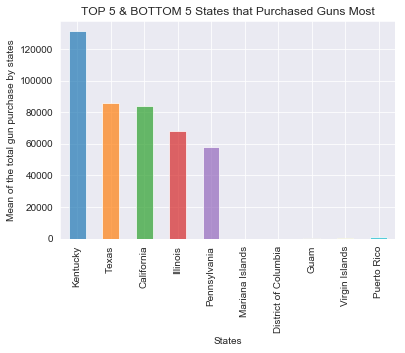

In [157]:
#making a plot of both top and bottom 5 states 
gun_top5.append(gun_bottom5).plot(kind='bar', alpha=.7);
plt.title("TOP 5 & BOTTOM 5 States that Purchased Guns Most");
plt.ylabel('Mean of the total gun purchase by states');
plt.xlabel('States');

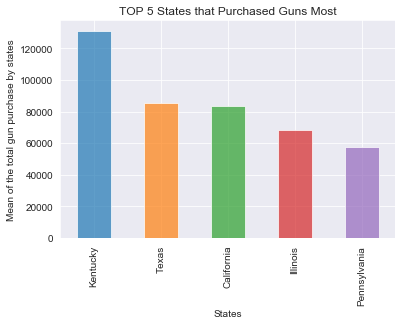

In [156]:
#making a plot of top 5 states 
gun_top5.plot(kind='bar', alpha=.7);
plt.title("TOP 5 States that Purchased Guns Most");
plt.ylabel('Mean of the total gun purchase by states');
plt.xlabel('States');

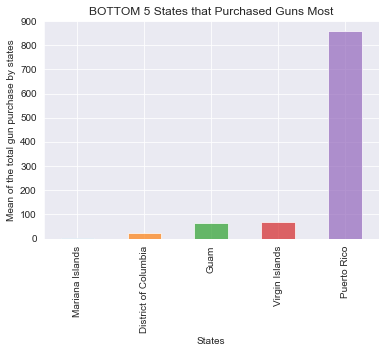

In [155]:
#making a plot of bottom 5 states 
gun_bottom5.plot(kind='bar', alpha=.7);
plt.title("BOTTOM 5 States that Purchased Guns Most");
plt.ylabel('Mean of the total gun purchase by states');
plt.xlabel('States');

### A1

Guns were purchased most in <b>Kentucky</b> by about <b>131,112</b>. Second was Texas, followed by California. Guns were purchased least in <b>Mariana</b> Islands, where the mean of the purchase was <b>2</b>. People in District of Columbia, Guam, Virgin Islands didn't purchase many guns as well, where the mean of the purchase was less than 100. The mean of the total gun purchase by states had significantly big standard deviation, implying that the purchase of guns differs a lot between the states.   

### Q2 Is there a correlation between persons per household and the mean of total gun purchase? or Is there a correlation between poverty rate and the mean of total gun purchase?

In [33]:
#merging two data : the mean of total gun purchase by states & the persons per household by states
df2=pph.append(gun_mean, ignore_index=True)
df2.index=['Persons per Household', 'Gun']

In [34]:
#changing columns to rows, rows to columns and remove NaN
df2=df2.transpose()
df2=df2.dropna()
df2

,Persons per Household,Gun
Alabama,2.55,29542.198238
Alaska,2.81,5011.643172
Arizona,2.69,19496.537445
Arkansas,2.53,16531.422907
California,2.96,83762.392070
Colorado,2.55,26689.348018
Connecticut,2.57,13956.502203
Delaware,2.62,2164.621145
Florida,2.63,51523.246696
Georgia,2.73,31761.859031


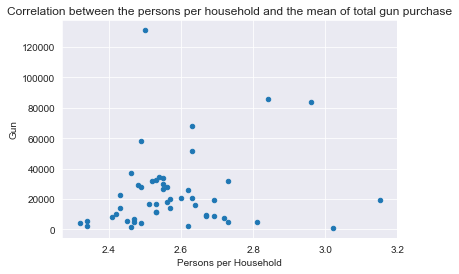

In [143]:
#drawing a scatter plot to check whether there is a correlation 
df2.plot(x='Persons per Household', y='Gun', kind='scatter');
plt.title('Correlation between the persons per household and the mean of total gun purchase');

In [36]:
#merging two data : the mean of total gun purchase by states & the poverty rate by states
df3=pov.append(gun_mean, ignore_index=True)
df3.index=['Poverty Rate', 'Gun']

In [37]:
#changing columns to rows, rows to columns and remove NaN
df3=df3.transpose()
df3=df3.dropna()
df3

,Poverty Rate,Gun
Alabama,17.1,29542.198238
Alaska,9.9,5011.643172
Arizona,16.4,19496.537445
Arkansas,17.2,16531.422907
California,14.3,83762.392070
Colorado,11.0,26689.348018
Connecticut,9.8,13956.502203
Delaware,11.7,2164.621145
Florida,14.7,51523.246696
Georgia,16.0,31761.859031


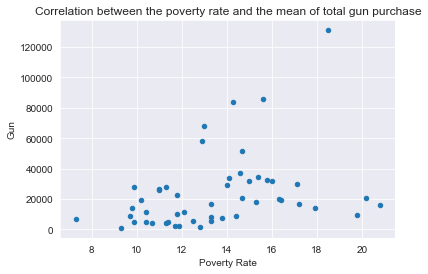

In [154]:
#drawing a scatter plot to check whether there is a correlation 
df3.plot(x='Poverty Rate', y='Gun', kind='scatter');
plt.title('Correlation between the poverty rate and the mean of total gun purchase');

### A2

It seems there's no correlation between the persons per household and the mean of total gun purchase. However, it seems there's a <b>weak correlation between the poverty rate and the mean of total gun purchase.</b> That means the poorer, the more likely to purchase guns. But it doesn't mean poverty causes purchasing guns. Also, as this analysis is not supported by precise statistics, the results are tentative.   

### Q3 How's the degree and income related?

In [164]:
#getting the statistics information about the income
income.iloc[0].describe()

count       50.000000
mean     28491.780000
std       4103.284534
min      21057.000000
25%      25443.750000
50%      27669.500000
75%      30977.000000
max      38803.000000
Name: Income, dtype: float64

In [109]:
#split the income into four categories
bin_edges=[21057.000000, 25443.750000, 27669.500000, 30977.000000, 38803.000000]
bin_names=['High', 'Moderately High', 'Medium', 'Low']
income.iloc[0]=pd.cut(income.iloc[0], bin_edges, labels=bin_names)

In [111]:
income

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Income,High,Low,Moderately High,High,Medium,Low,Low,Medium,Moderately High,Moderately High,...,Moderately High,High,Moderately High,High,Medium,Low,Low,High,Medium,Medium


In [112]:
#merge the data of income and degree 
df4=income.append(bachelor)
df4

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Income,High,Low,Moderately High,High,Medium,Low,Low,Medium,Moderately High,Moderately High,...,Moderately High,High,Moderately High,High,Medium,Low,Low,High,Medium,Medium
Bachelor or Higher,23.5,28,27.5,21.1,31.4,38.1,37.6,30,27.3,28.8,...,27,24.9,27.6,31.1,36,36.3,32.9,19.2,27.8,25.7


In [113]:
#change rows to columns, columns to rows 
df4=df4.transpose()
df4

,Income,Bachelor or Higher
Alabama,High,23.5
Alaska,Low,28
Arizona,Moderately High,27.5
Arkansas,High,21.1
California,Medium,31.4
Colorado,Low,38.1
Connecticut,Low,37.6
Delaware,Medium,30
Florida,Moderately High,27.3
Georgia,Moderately High,28.8


In [114]:
#remove NaN
df4.dropna()

,Income,Bachelor or Higher
Alabama,High,23.5
Alaska,Low,28
Arizona,Moderately High,27.5
Arkansas,High,21.1
California,Medium,31.4
Colorado,Low,38.1
Connecticut,Low,37.6
Delaware,Medium,30
Florida,Moderately High,27.3
Georgia,Moderately High,28.8


In [115]:
#checking the data types 
df4.dtypes

Income                object
Bachelor or Higher    object
dtype: object

In [117]:
#change string to float 
df4['Bachelor or Higher']=df4['Bachelor or Higher'].astype(float)

In [121]:
#get the mean percentage of degree after grouping by income 
df4=df4.groupby('Income').mean()
df4

,Bachelor or Higher
Income,
High,24.233333
Low,34.653846
Medium,30.033333
Moderately High,27.350000


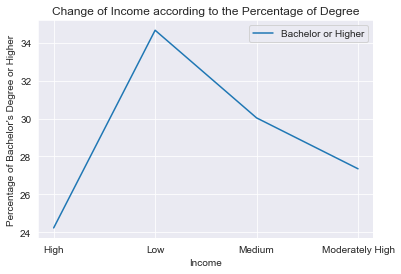

In [152]:
#visualizing data 
df4.plot();
labels=['High', 'Low', 'Medium', 'Moderately High']
locations=np.arange(len(df4))
plt.xticks(locations, labels);
plt.ylabel('Percentage of Bachelor\'s Degree or Higher');
plt.title('Change of Income according to the Percentage of Degree');

### A3

According to the graph, <b>the degree didn't help people to make more money.</b> Among the four categories, in the category of high income, the percentage of people who had bachelor's degree or higher was lowest. In contrast, in the category of low income, the percentage of people who had bachelor's degree or higher was highest. The degree had nothing to do with high income. 

<a id='conclusions'></a>
## Conclusions

<p> Guns were purchased <b>most in Kentucky</b> by about 131,112, and <b>least in Mariana</b> Islands by 2. The purchase of guns differed a lot between the states, as shown by the big standard deviation.</p>
<p> There was no strong correlation between the gun purchase and both two elements, which were persons per household and the poverty rate. But, <b>the poverty rate</b> seemed to be weakly correlated with the mean of total <b>gun purchase</b>.</p>
<p> Finally, <b>the degree didn't help people make more money.</b> While only 24% of people with high income had bachelor's degree or higher, over 34% of people with low income had bachelor's degree or higher.</p>
<p> However, the limitation of this analysis is that <b>precise statistics knowledge was not applied.</b> The results are at good tentative. Also, the data itself had some <b>missing values</b>, included data <b>only from certain time.</b> This analysis cannot be perfect, but still can help you give some insight about U.S. people and gun purchase.</p>